<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare the data</a></span></li><li><span><a href="#Perform-Stats" data-toc-modified-id="Perform-Stats-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Perform Stats</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Predict-the-model" data-toc-modified-id="Predict-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Predict the model</a></span></li></ul></li></ul></div>

# Exercise

In [78]:
# Import libraries
import pandas as pd

In [79]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [80]:
# Filter the data
philippine_data = data[
    data['economy']=='Philippines'
]

**INSTRUCTIONS**

1. Create candidate features to predict whether an owner will have debit card. Please make sure that your features make sense. Avoid leaky features.
2. Apply logistic regression on the data.
3. Evaluate your trained ML model. Does the output make sense? Using this model, what can you infer regarding the access to financial services in terms of debit card ownership? (e.g. does old age imply higher chance of having debit card?).



## Prepare the data

In [82]:
# Filter data
data = philippine_data[
    [
        'inc_q',
        'saved',
        'fin24',
        'fin2'
    ]
]

In [83]:
data

,inc_q,saved,fin24,fin2
114292,1,1,2,2
114293,5,1,1,1
114294,4,1,2,1
114295,5,1,1,1
114296,5,1,1,1
...,...,...,...,...
115287,1,0,1,2
115288,1,0,2,2
115289,4,1,1,2
115290,4,1,1,2


In [84]:
# Check educ column
#data['educ'].value_counts()

In [85]:
# Check educ column
data['inc_q'].value_counts()

5    228
4    209
3    203
1    192
2    168
Name: inc_q, dtype: int64

In [86]:
# Check inc_q column
data['saved'].value_counts()

1    595
0    405
Name: saved, dtype: int64

In [87]:
# Check inc_q column
data['fin24'].value_counts()

2    501
1    486
3     10
4      3
Name: fin24, dtype: int64

In [88]:
# Check emp_in column
#data['fin30'].value_counts()

In [89]:
# Check fin2 column
data['fin2'].value_counts()

2    765
1    234
4      1
Name: fin2, dtype: int64

In [90]:
# Replace 4 with 2 in fin2 column
data['fin2'] = data['fin2'].replace({4:2})

C:\Users\emers\AppData\Local\Temp\ipykernel_20820\2810368329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fin2'] = data['fin2'].replace({4:2})


In [91]:
# Replace 4 with 2 in fin2 column
data['fin24'] = data['fin24'].replace({4:2, 3:2})

C:\Users\emers\AppData\Local\Temp\ipykernel_20820\3217536646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fin24'] = data['fin24'].replace({4:2, 3:2})


In [54]:
# Replace 4 with 2 in fin2 column
#data['fin30'] = data['fin30'].replace({3:2})

C:\Users\emers\AppData\Local\Temp\ipykernel_20820\3507788279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fin30'] = data['fin30'].replace({3:2})


In [92]:
data

,inc_q,saved,fin24,fin2
114292,1,1,2,2
114293,5,1,1,1
114294,4,1,2,1
114295,5,1,1,1
114296,5,1,1,1
...,...,...,...,...
115287,1,0,1,2
115288,1,0,2,2
115289,4,1,1,2
115290,4,1,1,2


In [93]:
# Rename columns
data = data.rename(
    columns = {
        #'educ': 'educational attainment',
        'inc_q':'income group', 
        'saved':'has savings',
        'fin24': 'has emergency fund',
        #'fin30': 'has paid utility bills',
        'fin2': 'has debit card'
        }
)

In [94]:
data

,income group,has savings,has emergency fund,has debit card
114292,1,1,2,2
114293,5,1,1,1
114294,4,1,2,1
114295,5,1,1,1
114296,5,1,1,1
...,...,...,...,...
115287,1,0,1,2
115288,1,0,2,2
115289,4,1,1,2
115290,4,1,1,2


## Perform Stats


In [95]:
# Import the library
from sklearn.feature_selection import chi2

In [96]:
# Separate features and labels
X = data.drop('has debit card',axis=1)
y = data['has debit card']

In [97]:
# Run chi-square test
chi_scores = chi2(X, y)

In [98]:
# Create a dataframe for mapping p-values to features
p_values = pd.Series(
    chi_scores[1],
    index = X.columns
    )
p_values.sort_values(
    ascending = False, 
    inplace = True
    )

In [99]:
# Display data
p_values

has emergency fund    1.027878e-02
has savings           2.886978e-03
income group          1.089158e-14
dtype: float64

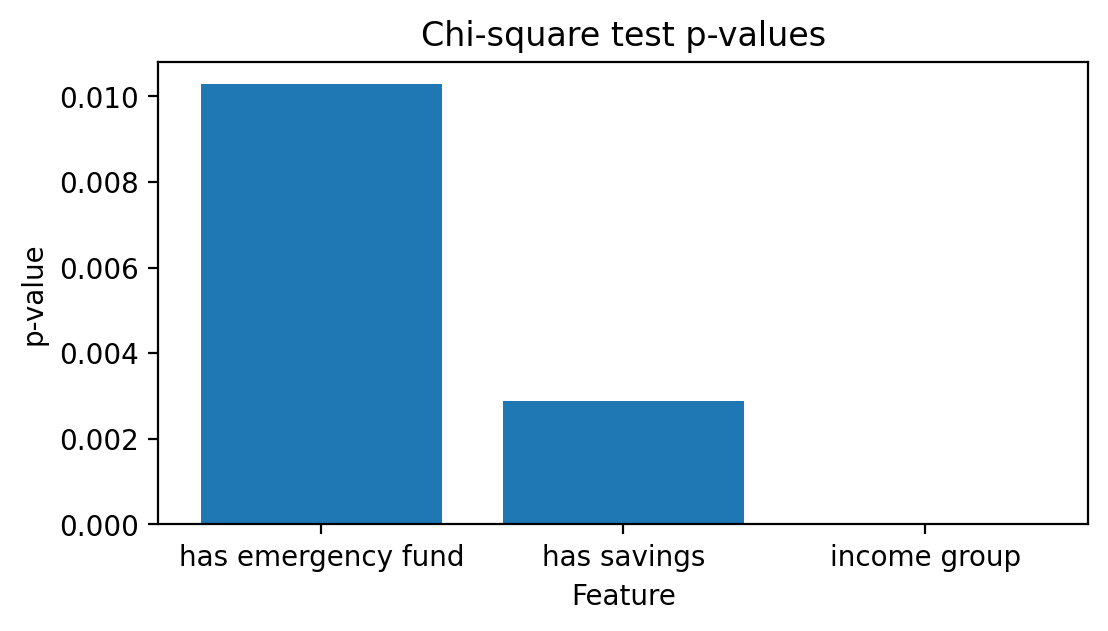

In [100]:
import matplotlib.pyplot as plt

# Plot p-values per feature
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
plt.bar(
    p_values.index,
    p_values.values
)

# Set title
plt.title('Chi-square test p-values')

# Set labels
plt.xlabel('Feature')
plt.ylabel('p-value')

# Show figure
plt.show()

## Train the model

In [101]:
# Reconfigure features and labels
X = data[['income group', 'has savings', 'has emergency fund']]
y = data['has debit card']

In [102]:
# Apply train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
    )

In [103]:
# Check imbalance
y_train.value_counts()

2    608
1    192
Name: has debit card, dtype: int64

In [104]:
# Call the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=42,
    class_weight='balanced'
    )

In [105]:
# Fit the model
trained_model = model.fit(X_train, y_train)

## Predict the model

In [106]:
# Predict using the trained models
predictions = trained_model.predict(X_test)

In [107]:
# Set the true and predicted values
y_true = y_test
y_pred = predictions

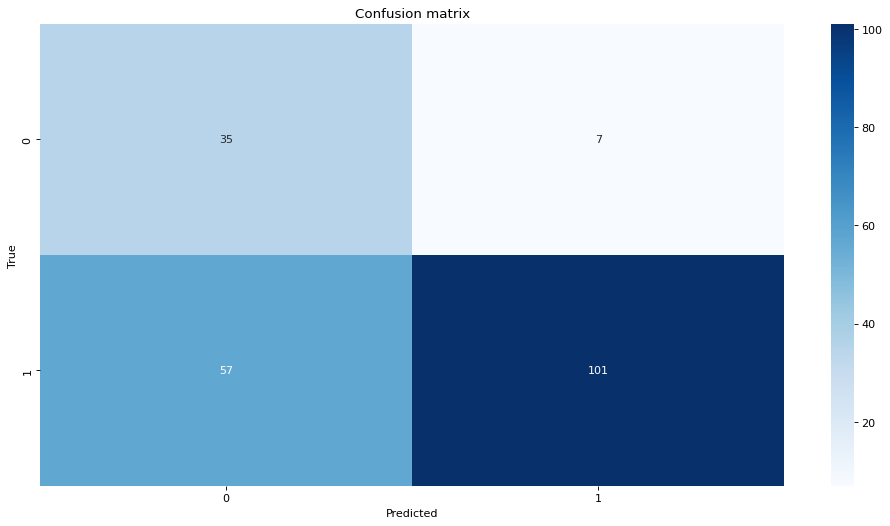

In [108]:
import seaborn as sns
# Display confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15,7.5), dpi=80)
plt.title('Confusion matrix')
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [109]:
# Display evaluation metrics
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.83      0.52        42
           2       0.94      0.64      0.76       158

    accuracy                           0.68       200
   macro avg       0.66      0.74      0.64       200
weighted avg       0.82      0.68      0.71       200

